In [ ]:
pip install numdifftools

In [ ]:
import numpy as np
import numdifftools as nd

In [ ]:
import matplotlib.pyplot as plt

from numpy import ma
from matplotlib import ticker, cm
from math import sqrt, pi
from numpy.linalg import norm
import time


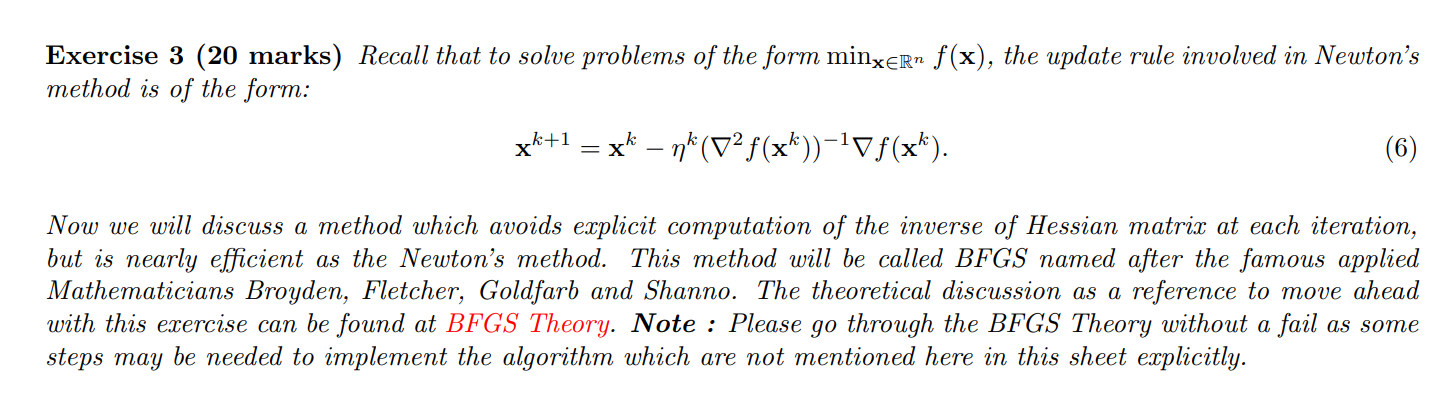





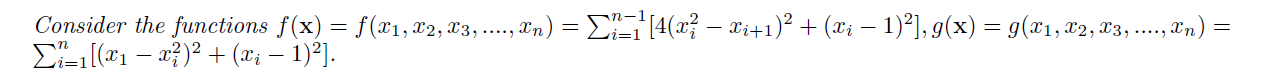

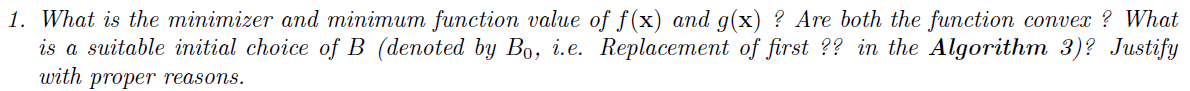

### Gradient of $ f(x)$:

The function $ f(x)$ is given by:
$ f(x) = P_{n-1} \prod_{i=1}^{n-1} [4(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2] $

1. **Partial Derivative of $ f(x)$ with respect to $ x_i$:**

$ \frac{\partial f}{\partial x_i} = P_{n-1} \cdot \frac{\partial}{\partial x_i} \prod_{i=1}^{n-1} [4(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2] $

2. **Using the Product Rule:**

$ \frac{\partial}{\partial x_i} \prod_{i=1}^{n-1} [4(x_{i}^{2} - x_{i+1})^2 + (x_{i} - 1)^2] = \sum_{j=1}^{n-1} \frac{\partial}{\partial x_i} [4(x_{j}^{2} - x_{j+1})^2 + (x_{j} - 1)^2] $

3. **Computing the Derivative Inside the Summation:**

   a. For the term $ 4(x_{j}^{2} - x_{j+1})^2:$

      $ \frac{\partial}{\partial x_i} [4(x_{j}^{2} - x_{j+1})^2] = 8(x_{j}^{2} - x_{j+1}) \cdot \frac{\partial}{\partial x_i} (x_{j}^{2} - x_{j+1}) $

   b. For the term $ (x_{j} - 1)^2:$

      $ \frac{\partial}{\partial x_i} [(x_{j} - 1)^2] = 2(x_{j} - 1) \cdot \frac{\partial}{\partial x_i} (x_{j} - 1) $

4. **Summing Up the Terms Over $ j$:**
$[ \frac{\partial f}{\partial x_i} = P_{n-1} \cdot \sum_{j=1}^{n-1} \left[ 8(x_{j}^{2} - x_{j+1}) \cdot \frac{\partial}{\partial x_i} (x_{j}^{2} - x_{j+1}) + 2(x_{j} - 1) \cdot \frac{\partial}{\partial x_i} (x_{j} - 1) \right] ]$

### Gradient of $ g(x)$:

The function $ g(x)$ is given by:
$ g(x) = \sum_{i=1}^{n} [(x_{1} - x_{i}^{2})^2 + (x_{i} - 1)^2] $

1. **Partial Derivative of $ g(x)$ with respect to $ x_i$:**

$ \frac{\partial g}{\partial x_i} = \frac{\partial}{\partial x_i} \sum_{i=1}^{n} [(x_{1} - x_{i}^{2})^2 + (x_{i} - 1)^2] $

2. **Differentiating Each Term Separately:**

   a. For the term $( (x_{1} - x_{i}^{2})^2 ):$

      $ \frac{\partial}{\partial x_i} [(x_{1} - x_{i}^{2})^2] = 2(x_{1} - x_{i}^{2}) \cdot \frac{\partial}{\partial x_i} (x_{1} - x_{i}^{2}) $

   b. For the term $( (x_{i} - 1)^2 \$:
      $ \frac{\partial}{\partial x_i} [(x_{i} - 1)^2] = 2(x_{i} - 1) \cdot \frac{\partial}{\partial x_i} (x_{i} - 1) $

Once we compute these partial derivatives, we can set them equal to zero and solve for $ x_i$ to find the critical points, i.e., the values of $ x_i$ at which the gradients vanish.
and these values are at for both function is 1 and minimum value of functions is 0
which means that $ x_i$ =0


$B_0 = I_n$, since we need it to be PSD and invertible and symmetric.

According to Hessian Update Rule: $B^{k+1} = (I-\mu^k \mathbf{s}^k (\mathbf{y}^k)^\top) B^{k} (I-\mu^k \mathbf{y}^k (\mathbf{s}^k)^\top) + \mu^k \mathbf{s}^k (\mathbf{s}^k)^\top$

 where $\mu^k = \frac{1}{(\mathbf{y}^k)^\top \mathbf{s}^k}$

 where $\mathbf{y}^k = (\nabla q(\mathbf{x}^{k+1})- \nabla {q} (\mathbf{x}^k))$ and $\mathbf{s}^k = (\mathbf{x}^{k+1}-\mathbf{x}^{k})$.

Minimizer for $f(x)$ is $[1,1,...,1]$ as it achieves its global minimum which is 0 at this point. Yes the function is convex as it is sum of convex functions. For $g(x)$ also the minimizer is $[1,1,...,1]$ and minimum is 0. Since all we are trying to do is replace inverse of Hessian with easily computable inverse, $B_0$ we can take to be directly the **identity**, since we just need it to be PSD and invertible and symmetric.

As above function are sum of convex function therefore they are convex as we know that sum of convex function is convex.

Now we have to take initial $B_0$ we can take identity as best option because it is positive definite and invertible therefore it is best choice to initialise our algo.

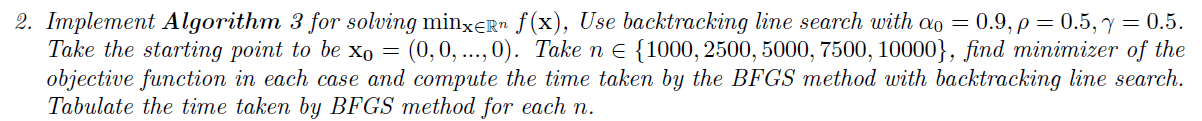

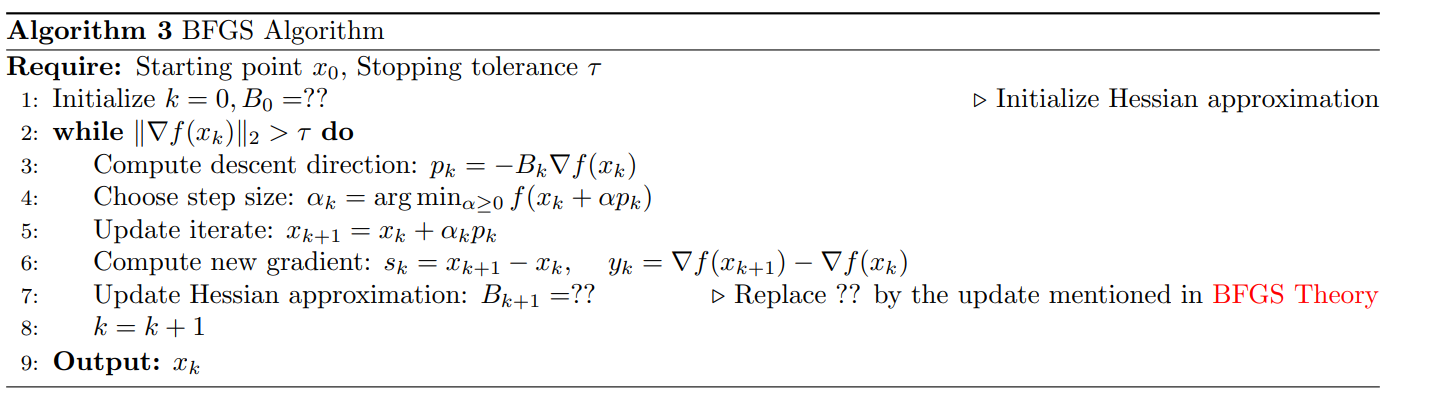

In [ ]:
def fx(xk):
  length = len(xk)
  sum = 0
  for i in range(length-1):
    sum+= 4*(xk[i]**2 - xk[i+1])**2 + (xk[i]-1)**2
  return sum

def gradient_fx(xk):
  n = len(xk)
  grad = []
  grad.append( 16*xk[0]*(xk[0]**2 - xk[1]) + 2*(xk[0]-1) )
  for i in range(1, n-1):
    grad.append(  -8*(xk[i-1]**2 - xk[i]) + 16*xk[i]*(xk[i]**2 - xk[i+1]) + 2*(xk[i]-1) )
  grad.append(-8*(xk[n-2]**2 - xk[n-1]))
  return np.array(grad)

In [ ]:

def get_alpha_bfgs(xk, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -gradient_fx(xk)
  while fx(xk + alpha*Bk@pk) > (fx(xk) + gamma*alpha*gradient_fx(xk)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs(x0, tau, alpha0, rho, gamma, max_iter=300):
  start_time = time.time()
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = gradient_fx(xk)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs(xk, alpha0, rho, gamma, Bk)
    xnext = xk - alpha*(Bk@pk)


    sk = xnext - xk
    yk = gradient_fx(xnext) - gradient_fx(xk)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = gradient_fx(xk)

    xks.append(xk)
    count += 1

  end_time = time.time()
  time_elapsed = end_time - start_time
  return count, xk, fx(xk), xks, time_elapsed

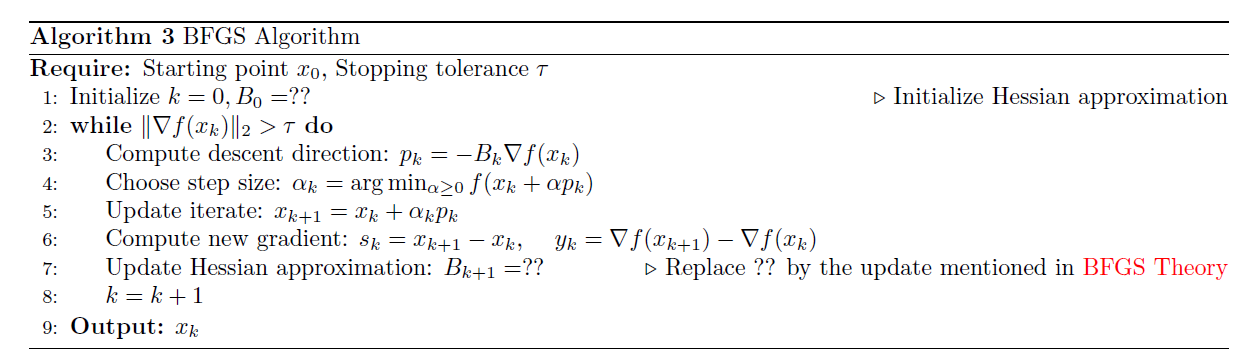

In [ ]:
alpha0 = 0.9
rho = 0.5
gamma = 0.5
numbers = [1000, 2500, 5000, 7500, 10000]
tau = 3
for n in numbers:
  x0 = [0 for i in range(n)]
  count, minimizer, minimum, xks, time_elapsed=bfgs(x0,tau, alpha0, rho, gamma)
  print(f"for no of times= {n}")
  print(f"total number of iterations: {count} | minimizer of fx: {minimizer[0:4]} | minimum value of fx: {minimum} | time taken by bfgs: {time_elapsed} in seconds")
  print("#################################################")

for no of times= 1000
total number of iterations: 14 | minimizer of fx: [0.99380687 0.99612733 0.99763127 0.99683267] | minimum value of fx: 0.27264961624956047 | time taken by bfgs: 3.758775234222412 in seconds
#################################################
for no of times= 2500
total number of iterations: 16 | minimizer of fx: [0.99603215 0.99727505 0.99980233 0.99430606] | minimum value of fx: 0.22284223033562517 | time taken by bfgs: 51.36466097831726 in seconds
#################################################
for no of times= 5000
total number of iterations: 30 | minimizer of fx: [0.99849386 0.99654191 0.99623296 1.00289672] | minimum value of fx: 0.466251679396133 | time taken by bfgs: 552.3635704517365 in seconds
#################################################
for no of times= 7500
total number of iterations: 30 | minimizer of fx: [0.99968788 0.9914969  0.99119188 0.99420182] | minimum value of fx: 0.43963379075591463 | time taken by bfgs: 1776.7262732982635 in seconds
###

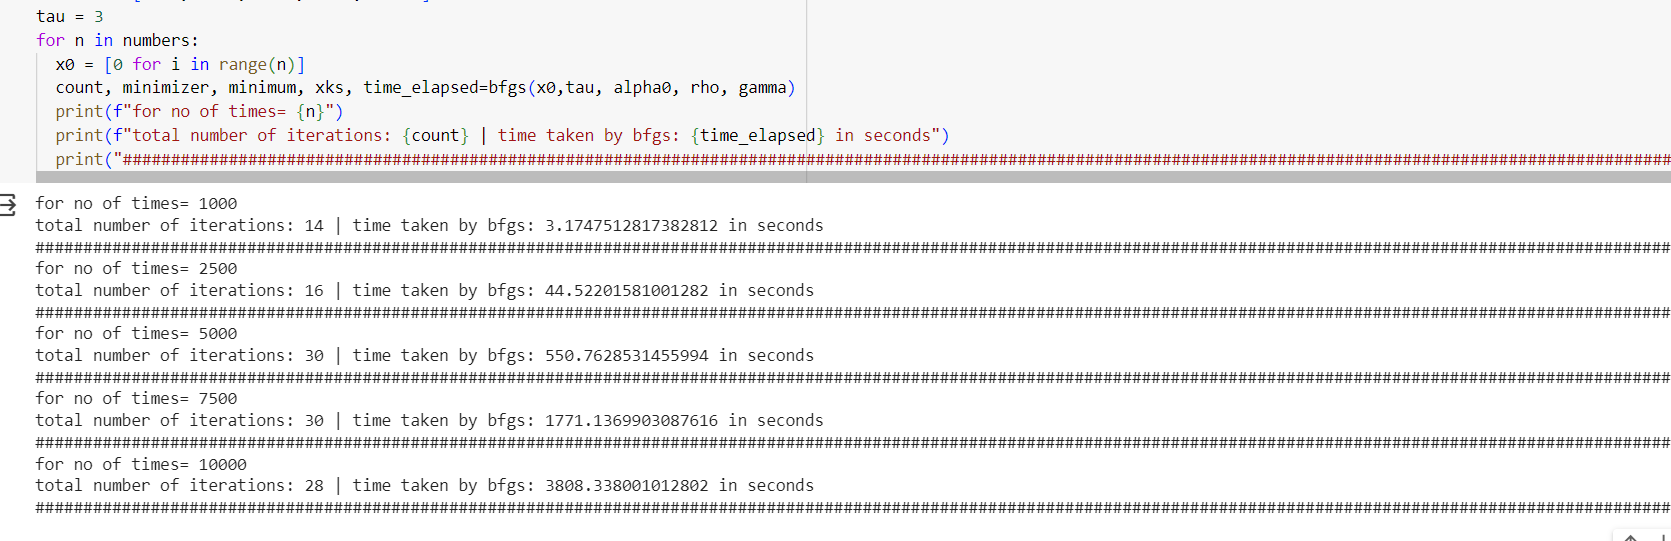

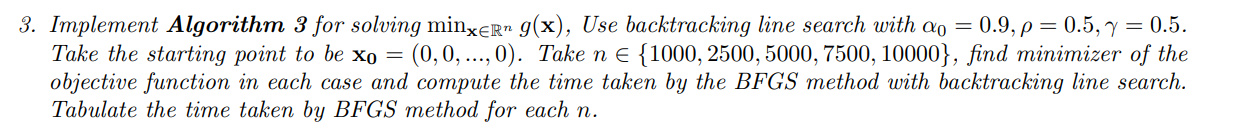

In [ ]:
# def gx(xk):
#   length = len(xk)
#   sum = 0
#   for i in range(length-1):
#     sum+= 4*(xk[i]**2 - xk[i+1])**2 + (xk[i]-1)**2
#   return sum
def gx(x):
  gx=[]
  for i in range(len(x)):
    f=((x[0]-x[i]**2)**2+(x[i]-1)**2)
    gx.append(f)
  return sum(gx)
# def gradient_gx(xk):
#   n = len(xk)
#   grad = []
#   grad.append( 16*xk[0]*(xk[0]**2 - xk[1]) + 2*(xk[0]-1) )
#   for i in range(1, n-1):
#     grad.append(  -8*(xk[i-1]**2 - xk[i]) + 16*xk[i]*(xk[i]**2 - xk[i+1]) + 2*(xk[i]-1) )
#   grad.append(-8*(xk[n-2]**2 - xk[n-1]))
# #   return np.array(grad)
# def gradient_gx(xk):
#   grad=nd.Gradient(gx)(xk)
#   return (grad)
def gradient_gx(xk):
  n = len(xk)
  grad = []
  first_grad = 0
  for i in range(1,n):
    first_grad += 2*(xk[0] - xk[i]**2)
  first_grad += 2*(xk[0]-1) + 2*(xk[0] - xk[0]**2)*(1-2*xk[0])
  grad.append( first_grad )
  for i in range(1, n):
    grad.append( -4*(xk[0] - xk[i]**2)*xk[i] + 2*(xk[i]-1) )
  return np.array(grad)

In [ ]:
def get_alpha_bfgs1(xk, alpha0, rho, gamma, Bk):
  alpha = alpha0
  pk = -gradient_gx(xk)
  while gx(xk + alpha*Bk@pk) > (gx(xk) + gamma*alpha*gradient_gx(xk)@Bk@pk):
    alpha = rho*alpha
  return alpha


def bfgs1(x0, tau, alpha0, rho, gamma, max_iter=500):
  start_time = time.time()
  xk = np.copy(x0)
  n = len(x0)
  Bk = np.eye(n)
  count = 0
  pk = gradient_gx(xk)
  xks = []
  xks.append(xk)
  while (norm(pk)>tau):
    if count > max_iter:
      break

    alpha = get_alpha_bfgs1(xk, alpha0, rho, gamma, Bk)
    xnext = xk - alpha*(Bk@pk)


    sk = xnext - xk
    yk = gradient_gx(xnext) - gradient_gx(xk)

    Bk = np.dot((np.eye(len(xk)) - np.outer(sk, yk) / np.dot(yk, sk)), np.dot(Bk, (np.eye(len(xk)) - np.outer(yk, sk) / np.dot(yk, sk)))) + np.outer(sk, sk) / np.dot(yk, sk)

    xk = xnext
    pk = gradient_gx(xk)

    xks.append(xk)
    count += 1

  end_time = time.time()
  time_elapsed = end_time - start_time
  return count, xk, gx(xk), xks, time_elapsed

In [ ]:
alpha0 = 0.9
rho = 0.5
gamma = 0.5
numbers = [1000, 2500, 5000, 7500, 10000]
tau = 3
for n in numbers:
  x0 = [0 for i in range(n)]
  count, minimizer, minimum, xks, time_elapsed=bfgs1(x0,tau, alpha0, rho, gamma)
  print(f"for no of times= {n}")
  print(f"total number of iterations: {count} | minimum value of gx:{minimum} | minimizer of gx: {minimizer[0:4]} | time taken by bfgs: {time_elapsed} in seconds")
  print("####################################")

for no of times= 1000
total number of iterations: 5 | minimum value of gx:0.00016420670144070933 | minimizer of gx: [0.99921415 0.99977464 0.99977464 0.99977464] | time taken by bfgs: 1.1253979206085205 in seconds
####################################
for no of times= 2500
total number of iterations: 5 | minimum value of gx:0.00033380886442940246 | minimizer of gx: [0.99924234 0.9997574  0.9997574  0.9997574 ] | time taken by bfgs: 14.449094295501709 in seconds
####################################
for no of times= 5000
total number of iterations: 5 | minimum value of gx:0.0006774623822820811 | minimizer of gx: [0.99923646 0.99975566 0.99975566 0.99975566] | time taken by bfgs: 96.7652268409729 in seconds
####################################
for no of times= 7500
total number of iterations: 5 | minimum value of gx:0.0009663940408219118 | minimizer of gx: [0.9991995  0.99968986 0.99968986 0.99968986] | time taken by bfgs: 293.2975718975067 in seconds
####################################
f

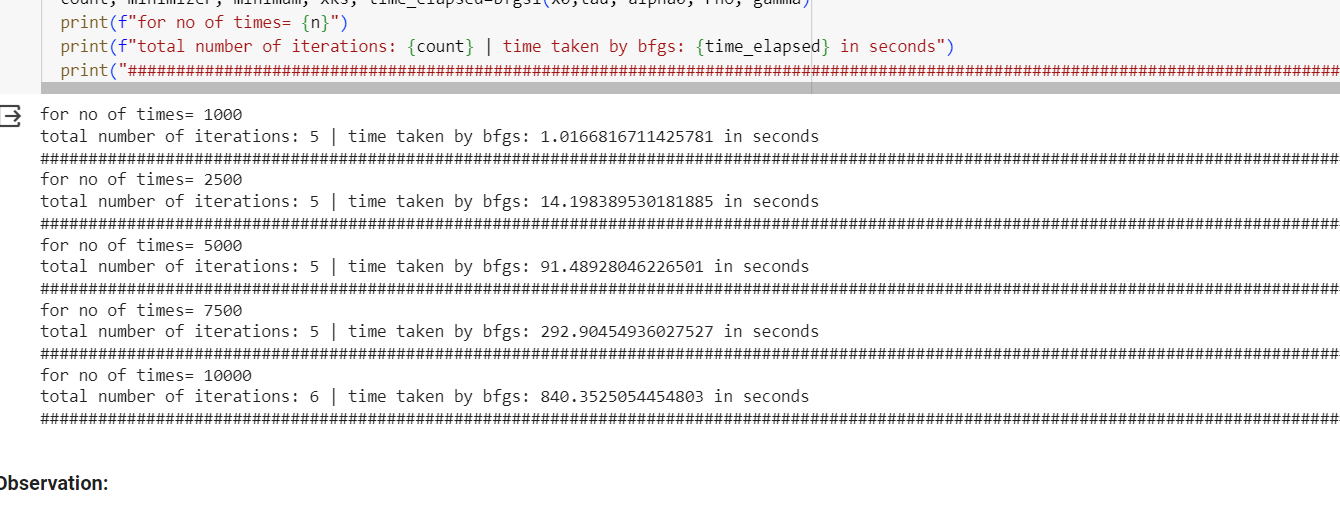

**Observation:**

for gx it is fast than fx because on comparing number of iteration we clearly found our claim so we can clearly say that it depends on function that how much time is taken by a algo to give max or min value.


In [ ]:
#hessian fx
import numpy as np
def hes_fx(xk):
  n = len(xk)
  hes = []
  lis=[0 for i in range(n)]
  lis[0]=16*(xk[0]**2 - xk[1]) + 2
  lis[1]=-16*xk[0]
  hes.append(lis)
  for i in range(1, n-1):
    lis=[0 for i in range(n)]
    lis[i-1]=-16*xk[i-1]
    lis[i]=16*(xk[i]**2-xk[i+1])+32*xk[i]**2+2+16*(xk[i-1]-xk[i])
    lis[i+1]=-16*xk[i]
    hes.append(lis)
  lisn=[0 for i in range(n)]
  lisn[n-2]=-16*(xk[n-2])
  lisn[n-1]=8
  hes.append(lisn)
  return np.array(hes)

In [ ]:
def hes_gx(x):
  n=len(x)
  hes=[]
  lis=[0 for i in range(n)]
  index_0=0
  for i in range(1,n):
    lis[0]=2*(1-2*x[0])**2-4*(x[0]-x[0]**2)+2*n
    lis[i]=-4*x[i]
  hes.append(lis)
  for i in range(1,n):
    newlis=[0 for i in range(n)]
    newlis[0]=-4*x[i]
    newlis[i]=-4*x[0]+12*x[i]**2+2
    hes.append(newlis)
  return hes
hes_gx([2 for i in range(6)])


[[38, -8, -8, -8, -8, -8],
 [-8, 42, 0, 0, 0, 0],
 [-8, 0, 42, 0, 0, 0],
 [-8, 0, 0, 42, 0, 0],
 [-8, 0, 0, 0, 42, 0],
 [-8, 0, 0, 0, 0, 42]]

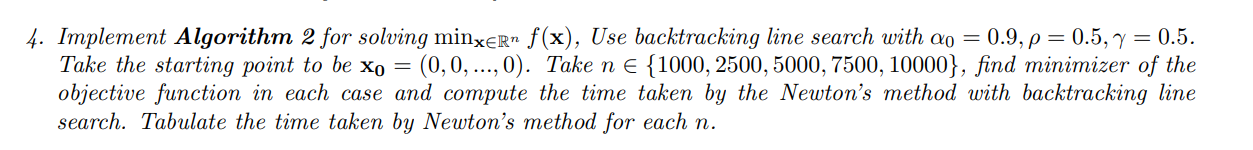

In [ ]:
def fx(xk):
  length = len(xk)
  sum = 0
  for i in range(length-1):
    sum+= 4*(xk[i]**2 - xk[i+1])**2 + (xk[i]-1)**2
  return sum

def gradient_fx(xk):
  n = len(xk)
  grad = []
  grad.append( 16*xk[0]*(xk[0]**2 - xk[1]) + 2*(xk[0]-1) )
  for i in range(1, n-1):
    grad.append(  -8*(xk[i-1]**2 - xk[i]) + 16*xk[i]*(xk[i]**2 - xk[i+1]) + 2*(xk[i]-1) )
  grad.append(-8*(xk[n-2]**2 - xk[n-1]))
  return np.array(grad)


def hessian_fx(xk):
  n = len(xk)
  hes = []
  lis=[0 for i in range(n)]
  lis[0]=16*(xk[0]**2 - xk[1]) + 2
  lis[1]=-16*xk[0]
  hes.append(lis)
  for i in range(1, n-1):
    lis=[0 for i in range(n)]
    lis[i-1]=-16*xk[i-1]
    lis[i]=16*(xk[i]**2-xk[i+1])+32*xk[i]**2+2+16*(xk[i-1]-xk[i])
    lis[i+1]=-16*xk[i]
    hes.append(lis)
  lisn=[0 for i in range(n)]
  lisn[n-2]=-16*(xk[n-2])
  lisn[n-1]=8
  hes.append(lisn)
  return np.array(hes)

def dk_fx(xk):
  return np.linalg.inv(hessian_fx(xk))

In [ ]:
def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_fx(xk)
  while fx(xk + alpha*Dk@pk) > (fx(xk) + gamma*alpha*gradient_fx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  start_time = time.time()
  xk = np.copy(x0)
  count = 0
  pk = gradient_fx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_fx(xk)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = gradient_fx(xk)
    xks.append(xk)
    count += 1
  end_time = time.time()
  time_elapsed = end_time - start_time
  return count, xk, fx(xk), xks, time_elapsed

In [ ]:
alpha0 = 0.9
rho = 0.5
gamma = 0.5
ns = [1000, 2500, 5000, 7500, 10000]
tau = 1
totaltimeelapsedforfx_innewton = []
for n in ns:
  x0 = [0 for i in range(n)]
  count, minimizer, minimum, xks, time_elapsed=newton_method_with_backtracking(x0,tau, alpha0, rho, gamma)
  print(f"for n = {n}")
  print(f"Total Number of iterations: {count} | minimizer of fx: {minimizer[0:4]} | Minimum value of fx: {minimum} | Total time taken: {time_elapsed}")
  print(".................................................................")
  totaltimeelapsedforfx_innewton.append(time_elapsed)

In [ ]:
def gx(xk):
  length = len(xk)
  sum = 0
  for i in range(length):
    sum+= (xk[0] - xk[i]**2)**2 + (xk[i]-1)**2
  return sum

def gradient_gx(xk):
  n = len(xk)
  grad = []
  first_grad = 0
  for i in range(1,n):
    first_grad += 2*(xk[0] - xk[i]**2)
  first_grad += 2*(xk[0]-1) + 2*(xk[0] - xk[0]**2)*(1-2*xk[0])
  grad.append( first_grad )
  for i in range(1, n):
    grad.append( -4*(xk[0] - xk[i]**2)*xk[i] + 2*(xk[i]-1) )
  return np.array(grad)

def hes_gx(x):
  n=len(x)
  hes=[]
  lis=[0 for i in range(n)]
  index_0=0
  for i in range(1,n):
    lis[0]=2*(1-2*x[0])**2-4*(x[0]-x[0]**2)+2*n
    lis[i]=-4*x[i]
  hes.append(lis)
  for i in range(1,n):
    newlis=[0 for i in range(n)]
    newlis[0]=-4*x[i]
    newlis[i]=-4*x[0]+12*x[i]**2+2
    hes.append(newlis)
  return hes

  for i in range(1,n):
    hessn[i][i] = 2 - 4*(xk[0] - xk[i]*2) + 8*(xk[i]**2)
    hessn[i][0] = hessn[0][i] #because it is a symmetric matrix
  return hessn


def dk_gx(xk):
  return np.linalg.inv(hes_gx(xk))

def get_alpha_newton(xk, alpha0, rho, gamma, Dk):
  alpha = alpha0
  pk = -gradient_gx(xk)
  while gx(xk + alpha*Dk@pk) > (gx(xk) + gamma*alpha*gradient_gx(xk)@Dk@pk):
    alpha = rho*alpha
  return alpha

def newton_method_with_backtracking(x0, tau, alpha0, rho, gamma):
  start_time = time.time()
  xk = np.copy(x0)
  count = 0
  pk = gradient_gx(xk)
  xks = []
  xks.append(xk)
  while norm(pk)>tau:
    Dk = dk_gx(xk)
    alpha = get_alpha_newton(xk, alpha0, rho, gamma, Dk)
    xk = xk - alpha*Dk@pk
    pk = gradient_gx(xk)
    xks.append(xk)
    count += 1
  end_time = time.time()
  time_elapsed = end_time - start_time
  return count, xk, gx(xk), xks, time_elapsed

In [ ]:
alpha0 = 0.9
rho = 0.5
gamma = 0.5
ns = [1000, 2500, 5000, 7500, 10000]
tau = 1
Totaltimeelapsedlistforgx_innewton = []
for n in ns:
  x0 = [0 for i in range(n)]
  count, minimizer, minimum, xks, time_elapsed=newton_method_with_backtracking(x0,tau, alpha0, rho, gamma)
  print(f"for n = {n}")
  print(f"Total number of iterations: {count} | Minimizer of gx: {minimizer[0:4]} | Minimum value of gx: {minimum} | Total time taken: {time_elapsed}")
  print(".........................................................................")
  Totaltimeelapsedlistforgx_innewton.append(time_elapsed)

**Observation:** the newton method is slow as compare to bgfs because it runs to fast and google colab crashes in case of newton but in case of bfgx for different values of n and for 10000 bfgs take more than 1 hour it runs but in newton its not running  .